In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
url="https://drive.google.com/u/0/uc?id=1Gfj3tj9zPhyC19JyPHHUGaKbcn2_lDAY&export=download&confirm=t&uuid=2950f825-8464-4897-a435-31ed5ef63242&at=AB6BwCAI5Oe5dOhda1jSxQvyvlwO:1702113962739"
#url='Andmed.csv'
df = pd.read_csv(url)


In [2]:

df.proovivotu_aeg = pd.DatetimeIndex(df['proovivotu_aeg'], dayfirst=True)
df.sort_values(by="proovivotu_aeg")
df["month"] = pd.DatetimeIndex(df['proovivotu_aeg']).month



In [3]:

#df['naitaja.nimetus'] = df['naitaja.nimetus'].map(lambda x: x.lstrip('\(.*\)'))
df["naitaja.nimetus"] = df["naitaja.nimetus"].str.replace(r"\s*\(\s*.*\s*\)\s*","", regex=True)
df["naitaja.nimetus"] = df["naitaja.nimetus"].str.replace("oC", "°C", regex=False)
df["naitaja.nimetus"] = df["naitaja.nimetus"].str.replace("juures", "", regex=False)
df["naitaja.nimetus"] = df["naitaja.nimetus"].str.replace(" ", "", regex=False)
df["naitaja.nimetus"] = df["naitaja.nimetus"].str.replace("fluorene", "floreen", regex=False)

print(df["naitaja.nimetus"].unique())
mapping = {
    'vastab nõuetele': 1,
    'I kvaliteediklass': 1,
    'II kvaliteediklass': 1,
    'III kvaliteediklass': 1,
    'halvem kui III kvaliteediklass': 0,
    'ei vasta nõuetele': 0
}

df['joogiveeks_sobivus'] = df['naitaja.hinnang'].map(mapping)
print(len(df[df['joogiveeks_sobivus'] == 0]))
df.dropna(inplace=True)

['Escherichiacoli' 'Coli-laadsedbakterid' 'Enterokokid'
 'Clostridiumperfringens' 'Termotolerantsedcoli-laadsedbakterid'
 'Sooleenterokokid' 'Kolooniatearv22°C' 'Pestitsiidid'
 'Pestitsiididesumma' 'Tetrakloroeteenjatrikloroeteen' 'PAH-dsumma' 'Lõhn'
 'Hägusus' 'Maitse' 'Legionellad' 'Legionellaspp.' 'Värvus' 'Jääkkloor'
 'Salmonella' 'Lõhnaläveindeks' 'maitseläveindeks' 'Metüül-kloorpürifoss'
 'beeta-Endosulfaan' 'alfa-Endosulfaan' 'Endosulfaansulfaat' 'p,p-DDE'
 'Malatioon' 'Vinklosoliin' 'Trifluraliin' 'Etüül-paratioon' 'Triallaat'
 'o,p-DDD' 'o,p-DDT' 'o,p-DDE' 'p,p-DDD' 'Bromopropülaat'
 'Dikloorfluaniid' 'Aldriin' 'Dieldriin' 'Heptakloor' 'p,p-DDT'
 'Diazinoon' 'HCH,beeta' 'HCH,alfa' 'Protsümidoon' 'Tolüülfluaniid'
 'alfa-Tsüpermetriin' 'lambda-Tsühalotriin' 'Teknaseen' 'HCH,gamma'
 'Propikonasool' 'Heksakloorbenseen' 'Klorotaloniil'
 'Heptakloorepoksiid-?-isomeer' 'trans-Heptakloorepoksiid' 'Endriin'
 'cis-Heptakloorepoksiid' 'Kloorpürifoss' 'Kloorfenvinfoss'
 'Pseudomonasaerugi

In [4]:

#filteredData = {}
#for feature in df["naitaja.nimetus"].unique():
#    subdata = df[df["naitaja.nimetus"].isin([feature])]
#    if(len(subdata) >= 200):
#        filteredData[feature] = subdata
    

In [5]:

#for label, feature in filteredData.items():

#    fig, axs = plt.subplots(figsize=(12, 4))
#    avg_values = subdata.groupby([(subdata.year)])["näitaja_sisaldus"].mean();
    
#    avg_values.plot(
#        kind='bar', rot=0, ax=axs)
#    plt.xlabel(label);
#    plt.show()

In [6]:
# Assuming df is your DataFrame and 'bacteria', 'drinking_water', 'year' are your column names
grouped = df.groupby(['naitaja.nimetus', 'year']) #,maakond
# Find the total number of tests per bacteria per year
total_tests = grouped['joogiveeks_sobivus'].count()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#print(df.groupby(['naitaja.nimetus', 'year', 'joogiveeks_sobivus']).size())
# Find the number of failed tests (drinking water equals 0) per bacteria per year
failed_tests = grouped['joogiveeks_sobivus'].apply(lambda x: (x==0).sum())

# Calculate the percentage of failed tests
percentage_failed = (failed_tests / total_tests) * 100

# Create a new DataFrame
new_df = pd.DataFrame({
    'naitaja.nimetus': failed_tests.index.get_level_values('naitaja.nimetus'),
    'Year': failed_tests.index.get_level_values('year'),
    #'Maakond': failed_tests.index.get_level_values('maakond'),
    'Percentage Failed': percentage_failed.values,
    'Total tests' : total_tests.values
})

# Reset the index
new_df.reset_index(drop=True, inplace=True)

print(new_df)

                           naitaja.nimetus  Year  Percentage Failed  \
0                      1,1,1-trikloroetaan  2012           0.000000   
1                      1,1,1-trikloroetaan  2016           0.000000   
2                      1,1,1-trikloroetaan  2019           0.000000   
3                      1,1,1-trikloroetaan  2022           0.000000   
4                         1,2-dikloroetaan  2012           0.000000   
5                         1,2-dikloroetaan  2013           0.000000   
6                         1,2-dikloroetaan  2014           0.000000   
7                         1,2-dikloroetaan  2015           0.000000   
8                         1,2-dikloroetaan  2016           0.000000   
9                         1,2-dikloroetaan  2017           0.000000   
10                        1,2-dikloroetaan  2018           0.000000   
11                        1,2-dikloroetaan  2019           0.000000   
12                        1,2-dikloroetaan  2020           0.000000   
13    

In [7]:
feature_to_remove = new_df.groupby('naitaja.nimetus').filter(lambda x: all(x['Percentage Failed'] == 0))
feature_names = feature_to_remove['naitaja.nimetus'].unique()
final_df = new_df[~new_df['naitaja.nimetus'].isin(feature_names)]

feature_to_remove2 = new_df.groupby('naitaja.nimetus').filter(lambda x: any(x['Total tests'] == 0))
feature_names2 = feature_to_remove2['naitaja.nimetus'].unique()
final_df = final_df[~final_df['naitaja.nimetus'].isin(feature_names2)]

grouped_df = final_df.groupby('naitaja.nimetus')['Total tests'].sum().reset_index()


top_20 = grouped_df.sort_values('Total tests', ascending=False)

final_df = final_df[final_df['naitaja.nimetus'].isin(top_20['naitaja.nimetus'])]
final_df.reset_index(drop=True, inplace=True)
print(final_df)

            naitaja.nimetus  Year  Percentage Failed  Total tests
0                Alumiinium  2012           1.251956          639
1                Alumiinium  2013           0.000000          632
2                Alumiinium  2014           0.000000          663
3                Alumiinium  2015           0.000000          685
4                Alumiinium  2016           0.147275          679
5                Alumiinium  2017           1.404056          641
6                Alumiinium  2018           0.000000          441
7                Alumiinium  2019           0.485437          206
8                Alumiinium  2020           0.000000          287
9                Alumiinium  2021           0.000000          291
10               Alumiinium  2022           0.322581          310
11               Alumiinium  2023           0.000000          151
12                Ammoonium  2012           2.656622         2522
13                Ammoonium  2013           2.344060         2517
14        

In [8]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#final_df = new_df
#plt.figure(figsize=(15, 12))
#sns.lineplot(data=final_df, x='Year', y='Percentage Failed', hue='naitaja.nimetus', style='naitaja.nimetus')

#plt.title('Failed Rate of Tests Over the Years')
#plt.xlabel('Year')
#plt.ylabel('Success Rate (%)')
#plt.legend(loc='lower right')

#plt.show()

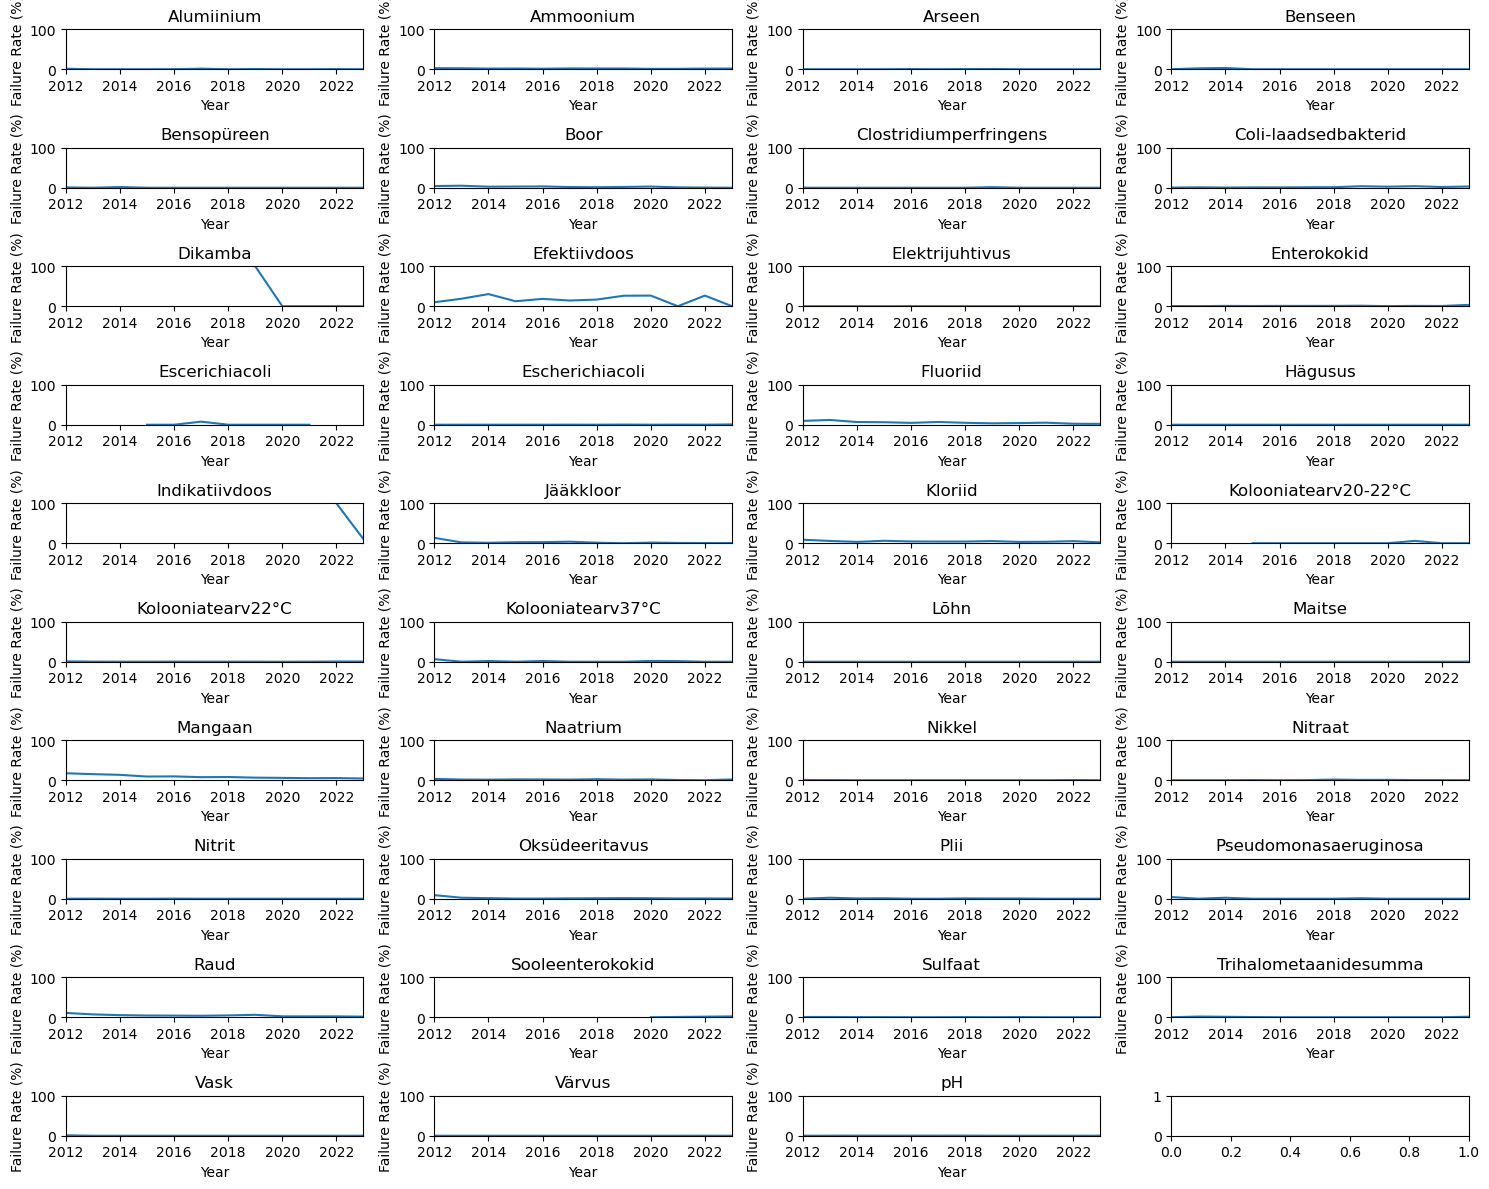

In [10]:

if(len(final_df.groupby(by="naitaja.nimetus")) % 4 == 0):
    rows = len(final_df.groupby(by="naitaja.nimetus"))//4
else: 
    rows = len(final_df.groupby(by="naitaja.nimetus"))//4 + 1
fig, axs = plt.subplots(rows, 4, figsize=(15, 12))

# Get unique categories
categories = final_df['naitaja.nimetus'].unique()

# Determine the global y-axis limits
global_min = final_df['Percentage Failed'].min()
global_max = final_df['Percentage Failed'].max()

for ax, category in zip(axs.flatten(), categories):
    data = final_df[final_df['naitaja.nimetus'] == category]

    
    sns.lineplot(data=data, x='Year', y='Percentage Failed', ax=ax)
    ax.set_title(category)
    ax.set_xlabel('Year')
    ax.set_ylabel('Failure Rate (%)')
    
    # Set the same y-axis limits for all subplots
    ax.set_ylim(global_min, global_max)
    ax.set_xlim(2012, 2023)

plt.tight_layout()
plt.show()